<a href="https://colab.research.google.com/github/miteshgaonkar/SarcasmAnalysis/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Read input file
df = pd.read_csv("train-balanced-sarcasm.csv", error_bad_lines=False)
#import csv
#df = pd.read_csv("sample_data/train-balanced-sarcasm.csv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

<ipython-input-2-e1e95d62c472>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("train-balanced-sarcasm.csv", error_bad_lines=False)


In [ ]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


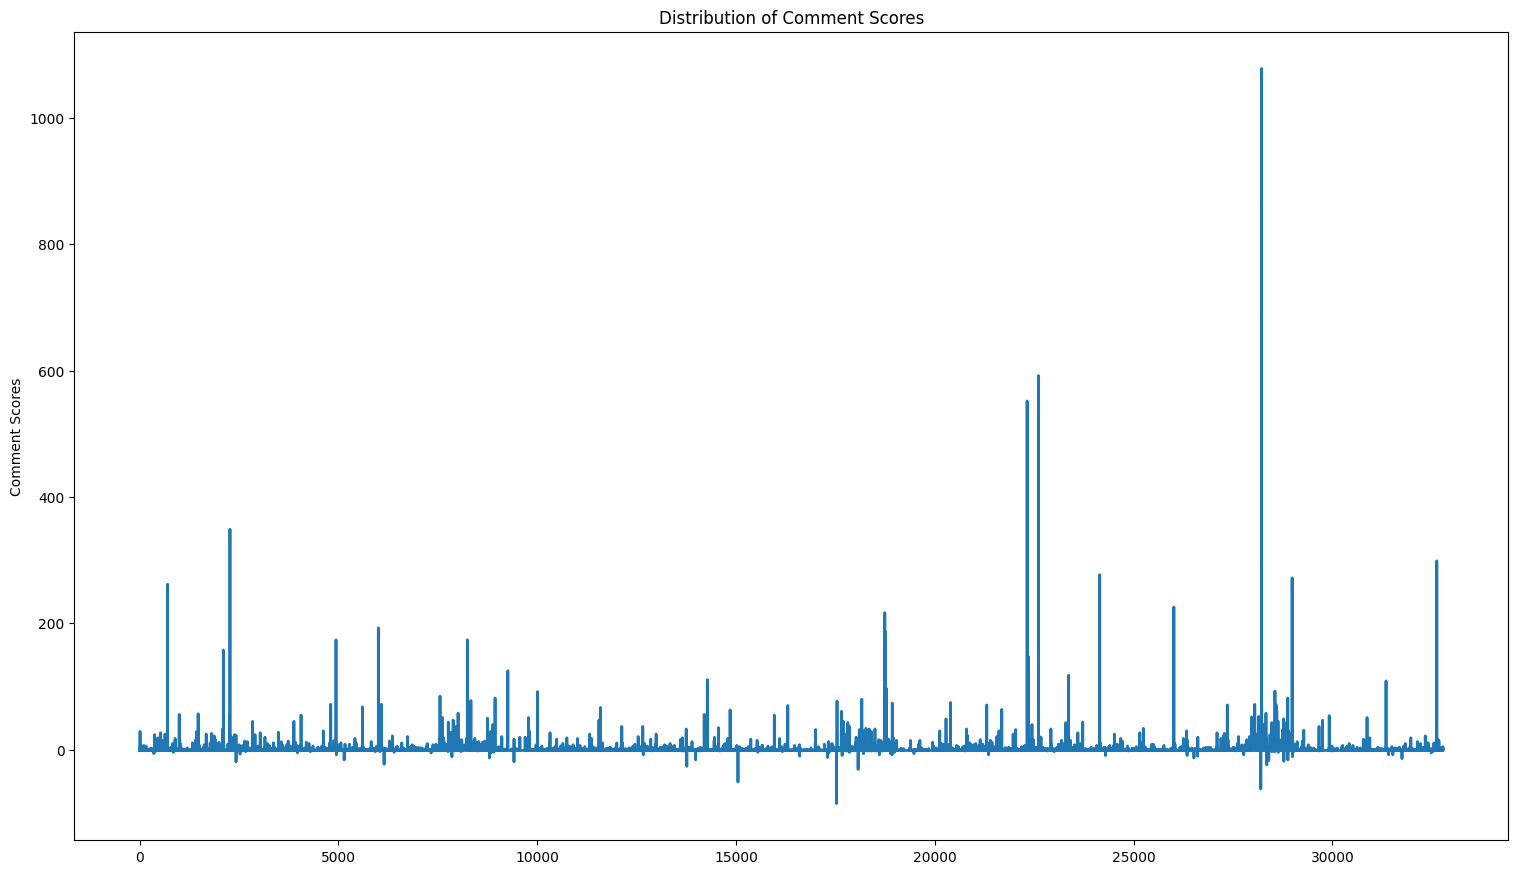

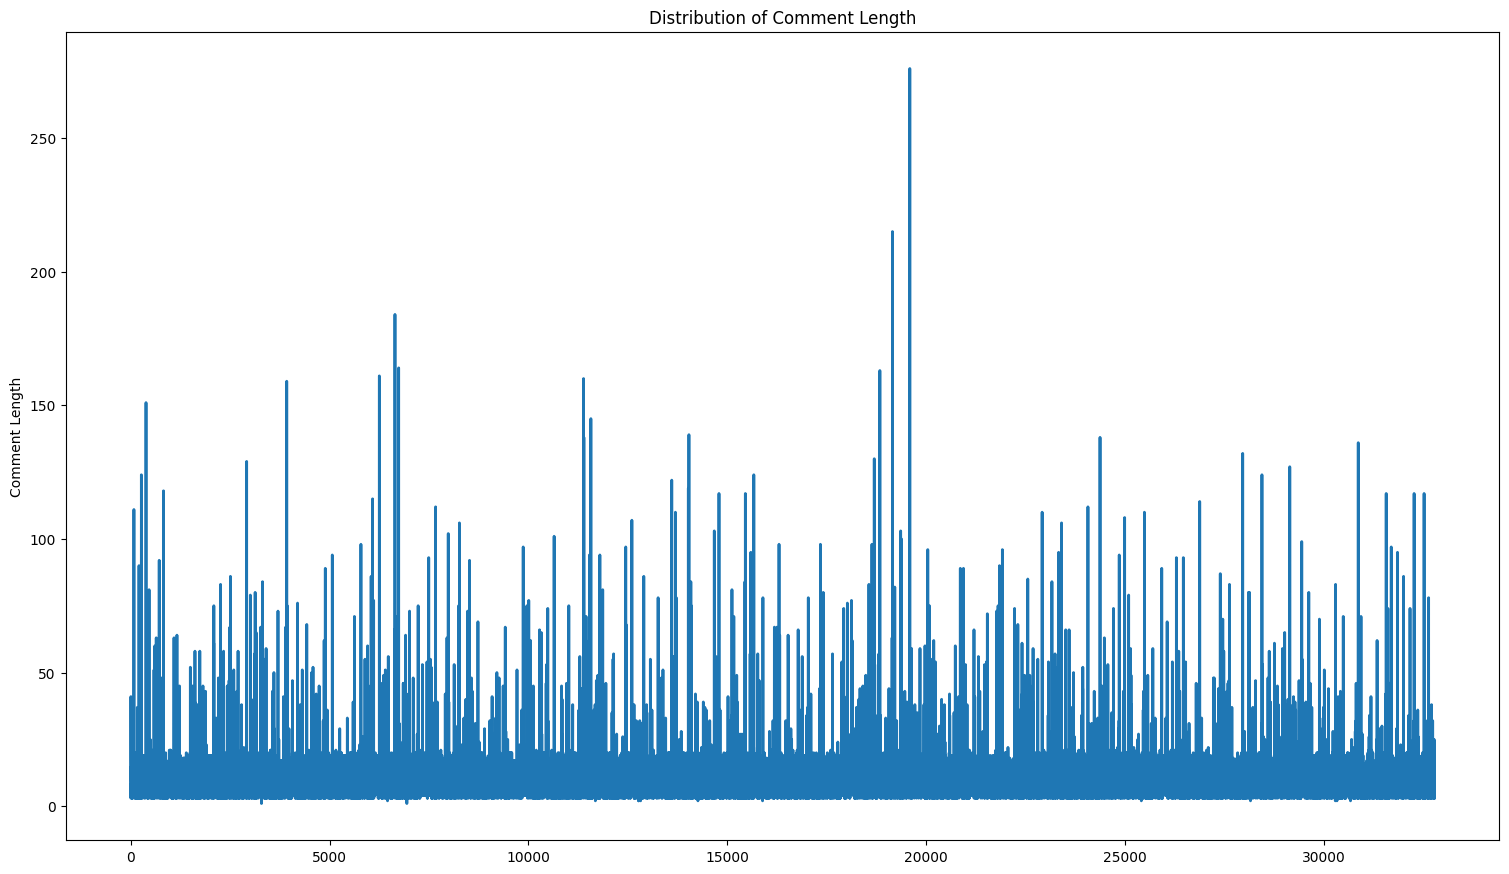

Text(0, 0.5, 'Comment Sarcasm')

Error in callback <function _draw_all_if_interactive at 0x7f9a5136b820> (for post_execute):


ValueError: ignored

Error in callback <function flush_figures at 0x7f9a513e1a60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#Plots
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

scores_arr = df["score"].values.tolist()

#Score Distribution
ax.plot(range(1, len(scores_arr)+1),scores_arr, linewidth=2.0)

plt.title("Distribution of Comment Scores")
plt.ylabel("Comment Scores")

plt.show()

#Comment Distribution
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

comment_length = list(map(lambda x : len(str(x)), df["comment"]))

ax.plot(range(1, len(comment_length)+1),comment_length, linewidth=2.0)

plt.title("Distribution of Comment Length")
plt.ylabel("Comment Length")

plt.show()

#Sarcasm Distribution
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

label_arr = df["label"].tolist()

ax.plot(range(1, len(label_arr) + 1),label_arr, linewidth=2.0)

plt.title("Distribution of Comment Sarcasm")
plt.ylabel("Comment Sarcasm")

#plt.show()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

# Fill missing or null values with an empty string
df['comment'] = df['comment'].fillna('')

# Remove non-alphanumeric characters and convert to lowercase
df['comment'] = df['comment'].apply(lambda x: re.sub(r'\W+', ' ', x.lower()))

# # Tokenize the comments
# df['tokens'] = df['comment'].apply(lambda x: word_tokenize(x))

# # Remove stop words from the tokens
# stop_words = set(stopwords.words('english'))
# df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stop_words])

# # Vectorize the comments
# vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform(df['comment'])

# # Convert the vectors to a dataframe
# df_vectors = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

# # Concatenate the original dataframe and the vector dataframe
# df = pd.concat([df, df_vectors], axis=1)

print("done")
# df.head()

done


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Tokenize the comments
df['tokens'] = df['comment'].apply(lambda x: word_tokenize(x))

# Remove stop words from the tokens
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stop_words])



print ("done")

done


In [ ]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,tokens
0,0,nc and nh,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...","[nc, nh]"
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,"[know, west, teams, play, west, teams, east, t..."
2,0,they were underdogs earlier today but since gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"[underdogs, earlier, today, since, gronk, anno..."
3,0,this meme isn t funny none of the new york nig...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,"[meme, funny, none, new, york, nigga, ones]"
4,0,i could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,"[could, use, one, tools]"


In [ ]:
snowball = nltk.stem.SnowballStemmer('english')
porter = nltk.PorterStemmer()

In [ ]:
df['tokens'][0]

['nc', 'nh']

In [ ]:
df['comment_snowball'] = df['comment'].apply(lambda x: ' '.join([snowball.stem(word) for word in word_tokenize(x)]))
df['comment_porter'] = df['comment'].apply(lambda x: ' '.join([porter.stem(word) for word in word_tokenize(x)]))

In [ ]:
# Vectorize the comments
vectorizer = TfidfVectorizer()
vectors_snowball = vectorizer.fit_transform(df['comment_snowball'])

# Convert the vectors to a dataframe
#df_vectors = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

# Concatenate the original dataframe and the vector dataframe
#df = pd.concat([df, df_vectors], axis=1)

print("done")
df.head()

done


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,tokens,comment_snowball,comment_porter
0,0,nc and nh,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...","[nc, nh]",nc and nh,nc and nh
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,"[know, west, teams, play, west, teams, east, t...",you do know west team play against west team m...,you do know west team play against west team m...
2,0,they were underdogs earlier today but since gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"[underdogs, earlier, today, since, gronk, anno...",they were underdog earlier today but sinc gron...,they were underdog earlier today but sinc gron...
3,0,this meme isn t funny none of the new york nig...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,"[meme, funny, none, new, york, nigga, ones]",this meme isn t funni none of the new york nig...,thi meme isn t funni none of the new york nigg...
4,0,i could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,"[could, use, one, tools]",i could use one of those tool,i could use one of those tool


In [ ]:
vectors_porter = vectorizer.fit_transform(df['comment_porter'])

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['comment_lemmatize'] = df['comment'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in word_tokenize(x)]))

In [ ]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,tokens,comment_snowball,comment_porter,comment_lemmatize
0,0,nc and nh,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...","[nc, nh]",nc and nh,nc and nh,nc and nh
1,0,you do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,"[know, west, teams, play, west, teams, east, t...",you do know west team play against west team m...,you do know west team play against west team m...,you do know west team play against west team m...
2,0,they were underdogs earlier today but since gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"[underdogs, earlier, today, since, gronk, anno...",they were underdog earlier today but sinc gron...,they were underdog earlier today but sinc gron...,they were underdog earlier today but since gro...
3,0,this meme isn t funny none of the new york nig...,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,"[meme, funny, none, new, york, nigga, ones]",this meme isn t funni none of the new york nig...,thi meme isn t funni none of the new york nigg...,this meme isn t funny none of the new york nig...
4,0,i could use one of those tools,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,"[could, use, one, tools]",i could use one of those tool,i could use one of those tool,i could use one of those tool


In [ ]:
vectors_lemma = vectorizer.fit_transform(df['comment_lemmatize'])

In [ ]:
vectors_orig = vectorizer.fit_transform(df['comment'])

In [ ]:
df_vectors = pd.concat([pd.DataFrame(vectors_orig.toarray(), columns=vectorizer.get_feature_names()),
                        pd.DataFrame(vectors_snowball.toarray(), columns=[f'{stemmer}_stemmed_{feature}' for feature in vectorizer.get_feature_names() for stemmer in ['snowball', 'porter']]),
                        pd.DataFrame(vectors_porter.toarray(), columns=[f'{stemmer}_stemmed_{feature}' for feature in vectorizer.get_feature_names() for stemmer in ['snowball', 'porter']]),
                        pd.DataFrame(vectors_lemma.toarray(), columns=['lemma_' + feature for feature in vectorizer.get_feature_names()])
                       ], axis=1)
df = pd.concat([df, df_vectors], axis=1)